# http://karpov.courses

In [1]:
# imports for the whole notebook
import pandas as pd
import numpy as np
import plotly.express as px 
import matplotlib.pyplot as plt
import seaborn as sns

### Описание данных

#### ads_data.csv – данные взаимодействий с рекламными объявлениями
* date – дата
* time – время
* event – действие (просмотр/клик)
* platform – платформа
* ad_id – id объявления
* client_union_id – id рекламного кабинета
* campaign_union_id – id рекламной кампании
* ad_cost_type – тип оплаты
* ad_cost – цена
* has_video – есть ли видео
* target_audience_count – размер аудитории
#### ads_clients_data.csv – характеристики рекламных клиентов
* date – дата
* client_union_id – id рекламного кабинета
* community_id – id сообщества
* create_date – дата создания рекламного клиента

### Задание 1
Для начала посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям. <br>Тонкий момент: помните, что некоторые показываемые объявления не кликались, и при группировке в таких случаях не будет строк с кликами, а для подсчёта среднего по объявлениям их нужно учитывать. Округлите ответы до целых чисел.

Чтение файлов с известными названиями напрямую из архива:

In [6]:
import zipfile


file_names = ['ads_data.csv', 'ads_clients_data.csv']
archive_name = 'ads.zip'

# Open the zip archive and read the CSV file
with zipfile.ZipFile(archive_name, 'r') as archive:
    with archive.open(file_names[0]) as csv_file:
        df_1 = pd.read_csv(csv_file)
    with archive.open(file_names[1]) as csv_file:
        df_2 = pd.read_csv(csv_file)

         date                 time event platform   ad_id  client_union_id  \
0  2019-04-01  2019-04-01 00:00:48  view  android   45061            34734   
1  2019-04-01  2019-04-01 00:00:48  view      web  121288           121288   
2  2019-04-01  2019-04-01 00:01:03  view  android  102737           102535   
3  2019-04-01  2019-04-01 00:01:03  view  android  107564           106914   
4  2019-04-01  2019-04-01 00:01:09  view  android    4922               37   

   campaign_union_id ad_cost_type  ad_cost  has_video  target_audience_count  
0              45061          CPM    200.6          0                1955269  
1             121288          CPM    187.4          0                 232011  
2             102564          CPC     60.7          0                   4410  
3             107564          CPM    217.3          0                  62711  
4               4400          CPC     60.1          0                1183501  
         date  client_union_id  community_id create_date


In [7]:
df_1.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [8]:
df_2.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [39]:
temp_1 = df_1.groupby(by='ad_id',).agg({'event': 'value_counts'}) \
    .rename(columns={'event': 'value_counts'}).reset_index()
temp_1.head()

,ad_id,event,value_counts
0,2,view,101
1,2,click,1
2,3,view,184
3,3,click,3
4,1902,view,41


In [38]:
temp_2 = pd.pivot(data=temp_1, columns='event', index='ad_id', values='value_counts')
temp_2.fillna(value=0, inplace=True)
temp_2.head()

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,0.0,35.0
2132,1.0,58.0


In [37]:
temp_2.mean(axis=0).round(0)

event
click    113.0
view     923.0
dtype: float64

### Задание 2
Давайте посмотрим на распределение показов объявлений!
* По оси x – число показов
* По оси y – доля объявлений с такими показами

Прологарифмируйте число показов, а затем постройте такой график, чтобы можно было понять форму распределения.

In [55]:
temp_2['view'].describe()

count       965.000000
mean        923.131606
std       12945.945595
min           0.000000
25%          35.000000
50%          82.000000
75%         208.000000
max      351802.000000
Name: view, dtype: float64

/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


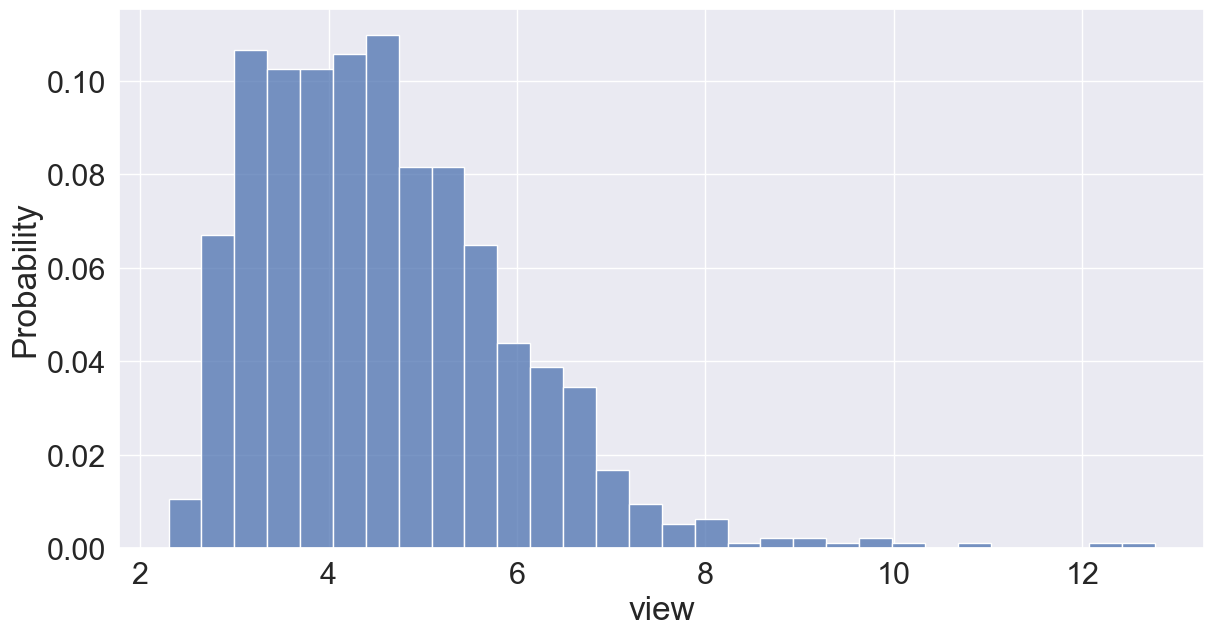

In [64]:
fig = plt.figure(figsize=(14, 7))
#  you can also use the axes_style() function in a with statement
# to temporarily set plot parameters.
# This also allows you to make figures with differently-styled axes
with sns.axes_style(style="darkgrid", rc={'font_scale': 2}):
    ax = fig.add_subplot()
    sns.histplot(x=np.log(temp_2['view']), stat='probability', ax=ax);

### Задание 3
Теперь нужно найти среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления, у которых не было показов (обычное среднее). После этого посчитайте скользящее среднее по полученному результату с окном в 2 элемента.

Вопрос: Какое значение скользящего среднего получим за 6 апреля 2019 года? Округлите ответ до целого числа.

In [75]:
df_1_views = df_1.query("event == 'view'")
df_1_views = df_1_views[['date', 'event', 'ad_id']]
df_1_views = df_1_views.replace(to_replace='view', value=1) \
    .rename(columns={'event': 'view_marker'})
df_1_views.head()
# df_1_views.info()

,date,view_marker,ad_id
0,2019-04-01,1,45061
1,2019-04-01,1,121288
2,2019-04-01,1,102737
3,2019-04-01,1,107564
4,2019-04-01,1,4922


In [85]:
# how many times a specific ad was view on a specific date
temp_1 = df_1_views.groupby(by=['ad_id','date',], as_index=False).agg({'view_marker': 'sum'})
temp_1.head()

,ad_id,date,view_marker
0,2,2019-04-01,83
1,2,2019-04-02,18
2,3,2019-04-01,158
3,3,2019-04-02,26
4,1902,2019-04-03,34


In [93]:
# how many ad views there are per day on average 
avg_views = temp_1.groupby(by=['date',]).agg({'view_marker': 'mean'}). \
    rename(columns={'view_marker': 'avg_views'})['avg_views']  # to make result a Series
avg_views

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
2019-04-06    277.122727
Name: avg_views, dtype: float64

In [95]:
# rolling average of avg_views
rolling_views = avg_views.rolling(window=2).mean()
rolling_views

date
2019-04-01           NaN
2019-04-02    146.134626
2019-04-03    150.869880
2019-04-04    419.927249
2019-04-05    797.505699
2019-04-06    598.116202
Name: avg_views, dtype: float64

### Задание 4
Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения просто среднего количества показов по дням и скользящего среднего на основе этих данных (которое мы получили в прошлом задании).

Посчитайте, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем. Запишите ответ в формате yyyy-MM-dd

Пример ответа:
<br>2020-12-31

/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a 

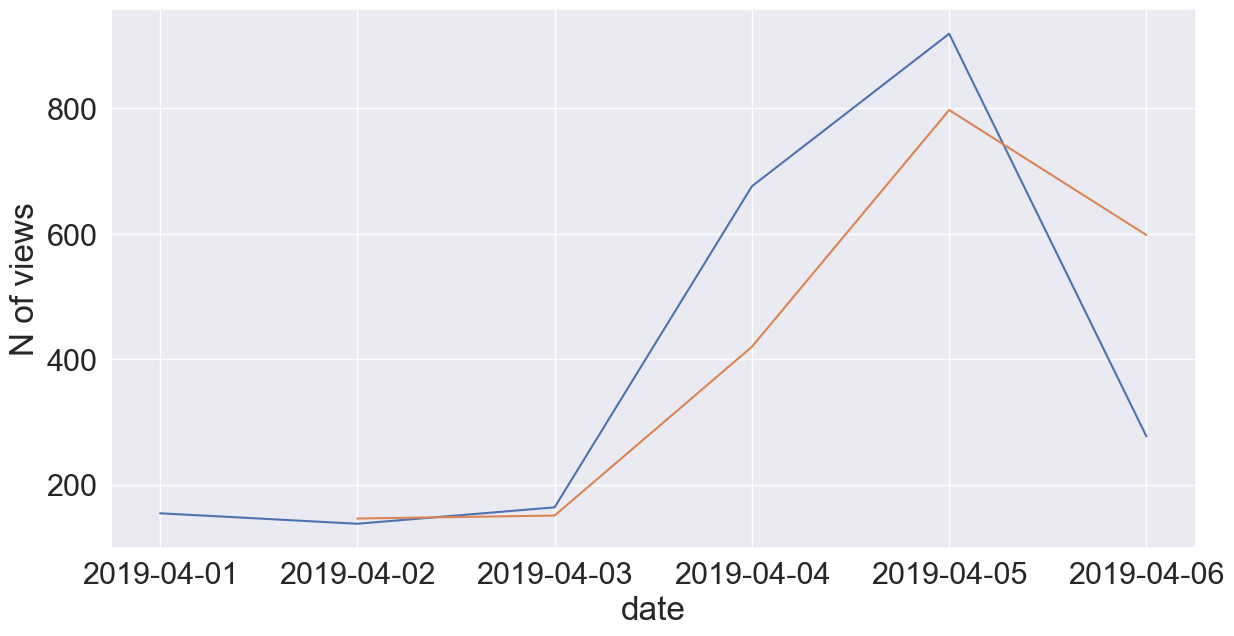

In [100]:
fig = plt.figure(figsize=(14, 7))
#  you can also use the axes_style() function in a with statement
# to temporarily set plot parameters.
# This also allows you to make figures with differently-styled axes
with sns.axes_style("darkgrid"):
    ax = fig.add_subplot()
    sns.lineplot(data=avg_views, ax=ax)
    sns.lineplot(data=rolling_views, ax=ax)
    ax.set_ylabel('N of views');

In [104]:
# absolute difference between rolling mean and standard arithmetic mean
(avg_views - rolling_views).abs().sort_values()

date
2019-04-02      8.347644
2019-04-03     13.082898
2019-04-05    121.603979
2019-04-04    255.974471
2019-04-06    320.993475
2019-04-01           NaN
Name: avg_views, dtype: float64

### Задание 5
Объедините данные рекламы с данными о рекламных клиентах и найдите среднее количество дней от даты создания рекламного клиента (create_date) и первым запуском рекламного объявления этим клиентом (date).

В качестве ответа укажите среднее число дней.

In [117]:
df_merged = pd.merge(left=df_1, right=df_2, how='inner', on= 'client_union_id')
df_merged['date_x'] = pd.to_datetime(arg=df_merged['date_x'])
df_merged['create_date'] = pd.to_datetime(arg=df_merged['create_date'])
df_merged.head()

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04


In [160]:
# Timedelta between registration of an user and his ad
df_merged['diff'] = df_merged['date_x'] - df_merged['create_date']
df_merged.info()  # no NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype          
---  ------                 --------------    -----          
 0   date_x                 1000000 non-null  datetime64[ns] 
 1   time                   1000000 non-null  object         
 2   event                  1000000 non-null  object         
 3   platform               1000000 non-null  object         
 4   ad_id                  1000000 non-null  int64          
 5   client_union_id        1000000 non-null  int64          
 6   campaign_union_id      1000000 non-null  int64          
 7   ad_cost_type           1000000 non-null  object         
 8   ad_cost                1000000 non-null  float64        
 9   has_video              1000000 non-null  int64          
 10  target_audience_count  1000000 non-null  int64          
 11  date_y                 1000000 non-null  object         
 12  community_id   

In [135]:
# Timedelta between registration of an user and his first ad
df_merged.groupby(by='client_union_id').agg({'diff':'min'}) \
    .rename(columns={'diff': 'min_diff'}) \
    .mean()
# ^ Mean time between user's registation and publication of his first ad 

min_diff   124 days 09:04:43.532219570
dtype: timedelta64[ns]

### Задание 6
💀 Сложное задание! 💀

Давайте вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.

Конверсия – отношение числа клиентов, которые совершили целевое действие (создали рекламу), к общему числу клиентов. Например, 1000 клиентов создали кабинет, но лишь 50 из них запустили рекламу.
Чтобы отобрать данные за нужный промежуток, можно воспользоваться сравнением времени до создания первой рекламы с pd.Timedelta(365, unit='day')

Ответ дайте в процентах и округлите до сотых. Пример ответа:
<br>34.69


NB! У нас могут быть люди, которые не сделали рекламу вообще. Не забудьте их учесть :)

In [161]:
# Every user in df_merged posted an add in less than a year after registation
(df_merged['diff'] > pd.Timedelta(365, unit='day')).unique()

array([False])

df_merged получается внутреним соединением DataFrame, содержащего только пользователей, взаимодействующих с рекламов (df_1) с DataFrame, в котором хранится информация о всех без исключения клиентах (df_1).
Таким образом, чтобы посчитать уникальных пользователей, разметивших рекламу, достаточно:

In [154]:
users_with_ads = df_merged['client_union_id'].nunique()
users_with_ads

838

С другой стороны, для нахождения числа всех без исключения пользователей:

In [163]:
all_users = df_2['client_union_id'].nunique()
all_users

122078

Конверсия - отношение числа пользователей, не использовавших некую услугу, к общему число пользователей. 

In [164]:
conversion =  np.round((100*users_with_ads / all_users), decimals=2)
conversion  # in %

0.69

### Задание 7
Давайте разобъем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления.

Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней). Список промежутков дней для метода pd.cut() – [0, 30, 90, 180, 365]. Создать временные промежутки можно с помощью pd.to_timedelta().

In [171]:
# Shortest time between registration and posting an ad for all unique users
users_with_ads = df_merged.groupby(by='client_union_id', as_index=False) \
    .agg({'diff': 'min'}).sort_values(by='diff', ascending=True)
users_with_ads.head(10)

,client_union_id,diff
665,108678,26 days
196,21194,28 days
520,38094,28 days
353,24853,28 days
745,116173,29 days
603,98415,29 days
95,2137,29 days
400,27420,29 days
677,110442,29 days
164,14606,29 days


In [175]:
users_with_ads['diff_categorical'] = pd.cut(
    x=users_with_ads['diff'],
    bins=pd.to_timedelta([0, 30, 90, 180, 365], unit='day'),
    labels=['less than 30 days', '30-90 days', '90-180 days', '180-365 days']
)
users_with_ads.head()

,client_union_id,diff,diff_categorical
665,108678,26 days,less than 30 days
196,21194,28 days,less than 30 days
520,38094,28 days,less than 30 days
353,24853,28 days,less than 30 days
745,116173,29 days,less than 30 days


In [178]:
# How many users posted an ad in less than 1 month?
users_with_ads['diff_categorical'].value_counts()

diff_categorical
90-180 days          396
30-90 days           263
180-365 days         168
less than 30 days     11
Name: count, dtype: int64

### Задание 8
Постройте интерактивный барплот, на котором будут показаны категории с количеством уникальных клиентов в них (то, что у вас получилось на прошлом степе, по запуску первого рекламного объявления). Расположите их так, чтобы внизу была самая малочисленная, а наверху – самая большая.

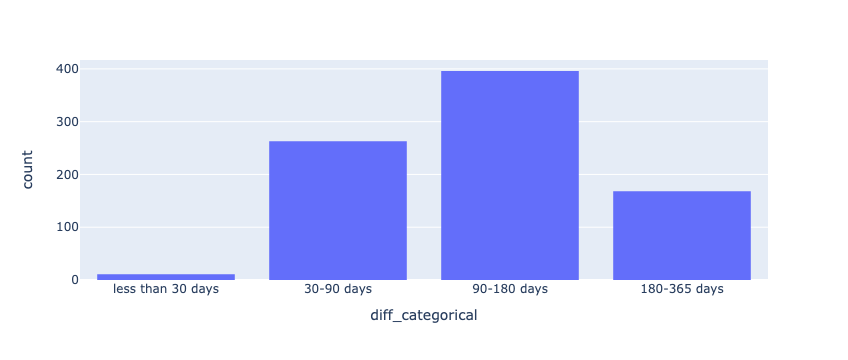

In [187]:
fig = px.histogram(data_frame=users_with_ads, x='diff_categorical',)

fig.show()

### Дополнительный проект
В данном проекте вы поработаете с довольно нетипичными для аналитика данными: gff файлом, который описывает геном мухи (описание формата - http://gmod.org/wiki/GFF3). При его выполнении вам может понадобиться часть конспекта про работу со строковыми данными, а именно – про строковые методы серий.

In [2]:
# GFF is a standard file format for storing genomic features in a text file.
# GFF stands for Generic Feature Format.
# GFF files are plain text, 9 column, tab-delimited files. 
df = pd.read_csv('gff.tsv', sep='\t')
df.head()

,seq_id,source,type,start,end,score,strand,phase,attributes
0,chr17,RefSeq,exon,6811330,6811453,.,+,.,Parent=XM_001475631.1
1,chr17,RefSeq,CDS,6808204,6808245,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
2,chr17,RefSeq,CDS,6811792,6811869,.,+,2,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
3,chr17,RefSeq,exon,6806513,6806553,.,+,.,Parent=XM_001475631.1
4,chr17,RefSeq,five_prime_UTR,6806513,6806526,.,+,.,Parent=XM_001475631.1


#### Задание 1
Какое значение атрибута Parent самое частое?

In [196]:
# How does the required str look like?
df['attributes'][55]

'Name=CDS:NC_000083.5:LOC100040603;Parent=XM_001475631.1,'

##### How to create a pattern to extract the required strings?
(XM_\d+\.\d+): This part is enclosed in parentheses to capture the desired pattern. Let's break it down further:
- XM_: This matches the literal characters 'XM_' exactly as they appear in the text.
- \d+: This matches one or more digits. \d represents any digit (0-9), and + indicates that there can be one or more occurrences of digits.
- \.: This matches a literal dot character. Since dot has a special meaning in regular expressions, it needs to be escaped with a backslash \ to match it literally.
- \d+: This again matches one or more digits.

In [4]:
pattern = r'(XM_\d+\.\d+)'
df['Parent_extracted'] = df['attributes'].str.extract(pat=pattern)

In [211]:
df['Parent_extracted'].value_counts()

Parent_extracted
XM_001475631.1    512
Name: count, dtype: int64

#### Задание 2
Какое самое частое значение в колонке type?

In [212]:
df['type'].value_counts(ascending=False)

type
exon               201
CDS                170
five_prime_UTR      47
mRNA                33
three_prime_UTR     32
protein             29
Name: count, dtype: int64